In [1]:
import math
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import sys
if '/opt/ros/kinetic/lib/python2.7/dist-packages' in sys.path: sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
import cv2
from gradcam_utils import *
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, confusion_matrix
from matplotlib import pyplot
import seaborn as sn
import pandas as pd



Using TensorFlow backend.
/home/ruthz/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ruthz/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ruthz/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ruthz/.local/lib/python3.5/site-packages/tensorflow/python/fra

In [21]:
DATASET_ROOT = 'data/test'
GT_ROOT = 'data/ground_truth'
CLASSES = ['carpet', 'grid', 'leather', 'tile', 'wood']

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(DATASET_ROOT,
                                                    class_mode='categorical',
                                                    interpolation='bilinear',
                                                    target_size=(224, 224),
                                                    batch_size=1,
                                                    shuffle=False,
                                                    classes=CLASSES)
unique, counts = np.unique(test_generator.labels, return_counts=True)
print(dict(zip(CLASSES, counts)))

Found 515 images belonging to 5 classes.
{'grid': 78, 'wood': 79, 'leather': 124, 'carpet': 117, 'tile': 117}


In [22]:
model = load_model('save/texturenet.h5')
#for l in model.layers:
    #print(l.name)

**ROC Curves**

**Getting prediction probabilities**

In [23]:
probs = model.predict(test_generator)
#print(probs)
probs.shape
is_pass_threshold = np.zeros((515, len(CLASSES)))
is_pass_threshold[np.arange(515), np.argmax(probs, axis=1)] = 1
print(is_pass_threshold)


[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


**Getting Individual binary outputs for each class from the test dataset**

In [5]:
carpet_test = np.zeros([515,1])
grid_test = np.zeros([515,1])
leather_test = np.zeros([515,1])
tile_test = np.zeros([515,1])
wood_test = np.zeros([515,1])

In [6]:
for i in range(len(test_generator.filenames)):
    test_generator.filenames
    for j in range(len(test_generator.filenames[i])):
        if test_generator.filenames[i][j]== "/":
            break
    correct_class = test_generator.filenames[i][0:j]
    if correct_class == "carpet":
        carpet_test[i] = 1
    if correct_class == "grid":
        grid_test[i] = 1
    if correct_class == "leather":
        leather_test[i] = 1
    if correct_class == "tile":
        tile_test[i] = 1
    if correct_class == "wood":
        wood_test[i] = 1

**Getting individual class probabilities**

In [7]:
carpet_prob = probs[:,0]
grid_prob = probs[:,1]
leather_prob = probs[:,2]
tile_prob = probs[:,3]
wood_prob = probs[:,4]

**Plotting ROC Curves**

AUC for Carpet class: 0.995


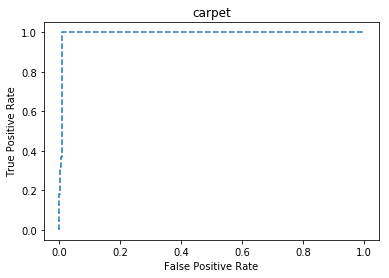

In [11]:
auc = roc_auc_score(carpet_test, carpet_prob)
print('AUC for Carpet class: %.3f' % auc)
fpr, tpr, _ = roc_curve(carpet_test,carpet_prob)
pyplot.plot(fpr, tpr, linestyle='--')
pyplot.title("carpet")
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

AUC for Carpet class: 0.994


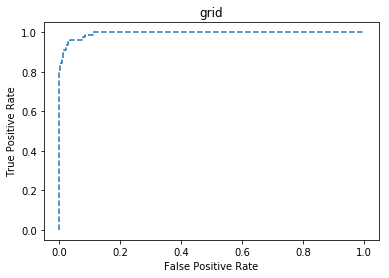

In [105]:
auc = roc_auc_score(grid_test, grid_prob)
print('AUC for Carpet class: %.3f' % auc)
fpr, tpr, _ = roc_curve(grid_test,grid_prob)
pyplot.plot(fpr, tpr, linestyle='--')
pyplot.title("grid")
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

AUC for Carpet class: 1.000


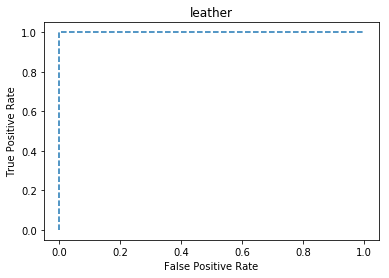

In [106]:
auc = roc_auc_score(leather_test, leather_prob)
print('AUC for Carpet class: %.3f' % auc)
fpr, tpr, _ = roc_curve(leather_test,leather_prob)
pyplot.plot(fpr, tpr, linestyle='--')
pyplot.title("leather")
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

AUC for Carpet class: 0.996


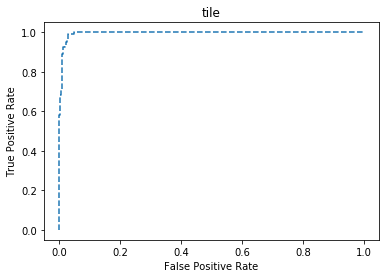

In [108]:
auc = roc_auc_score(tile_test, tile_prob)
print('AUC for Carpet class: %.3f' % auc)
fpr, tpr, _ = roc_curve(tile_test,tile_prob)
pyplot.plot(fpr, tpr, linestyle='--')
pyplot.title("tile")
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

AUC for Carpet class: 0.993


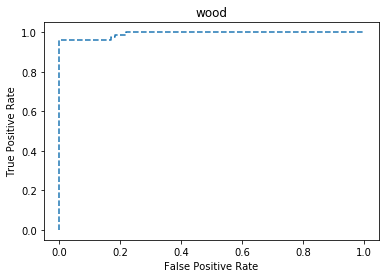

In [109]:
auc = roc_auc_score(wood_test, wood_prob)
print('AUC for Carpet class: %.3f' % auc)
fpr, tpr, _ = roc_curve(wood_test,wood_prob)
pyplot.plot(fpr, tpr, linestyle='--')
pyplot.title("wood")
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

**Compute Overall Accuracy in the Test set**

In [17]:
test_loss, test_accuracy = model.evaluate(test_generator)


515/515 [==============================] - 27s 52ms/step


In [18]:
print (test_accuracy*100)

93.00971031188965


In [25]:
predictions = model.predict_generator(test_generator)


In [26]:
predictions = np.argmax(predictions, axis=1)

In [28]:
cm = confusion_matrix(test_generator.classes,predictions)
print(cm)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

[[116   0   0   0   1]
 [  0  75   0   3   0]
 [  0   0 124   0   0]
 [  0  29   0  88   0]
 [  3   0   0   0  76]]
[[0.99145299 0.         0.         0.         0.00854701]
 [0.         0.96153846 0.         0.03846154 0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.         0.24786325 0.         0.75213675 0.        ]
 [0.03797468 0.         0.         0.         0.96202532]]


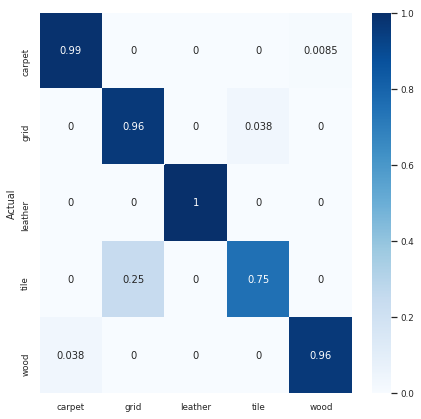

In [30]:
plt_cm = pd.DataFrame(cm, index=CLASSES, columns=CLASSES)
plt_cm.index.name = "Actual"
plt_cm.index.columns = "Predicted"
plt.figure(figsize = (7,7))
sn.set(font_scale=0.8)
sn.heatmap(plt_cm, cmap="Blues", annot=True,annot_kws={"size": 10})